In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt#
import datetime
from datetime import timedelta  
import timeboard as tb # turnos 

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


#otro graficador
import seaborn as sns

#stats
import researchpy as rp

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

'es_ES.UTF-8'

# importar funciones locales

In [2]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())


['/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc']

# importo BD 

In [3]:
os.getcwd()

'/home/egidio/Dropbox/Trabajos científicos/Conocimiento 131'

In [4]:
db3 = pd.read_excel('./BDs/Tabulación 3.xlsx')

In [5]:
BD = db3

In [6]:
BD.columns

Index(['Ciudad', 'Edad', 'Sexo', 'Niv. Educación', 'Nacionalidad',
       'Número SAMU', 'Conocimiento', 'Pertinencia', 'Difusión'],
      dtype='object')

In [7]:
for cols in BD.columns.unique():
    print (cols)
    BD[cols].value_counts().head()

Ciudad


Viña del mar    100
Quillota        100
Quintero        100
La Ligua        100
Name: Ciudad, dtype: int64

Edad


18    25
15    20
17    16
31    16
22    15
Name: Edad, dtype: int64

Sexo


mujer     215
hombre    184
otro        1
Name: Sexo, dtype: int64

Niv. Educación


media            208
universitario     70
técnico           59
básica            57
sin estudios       6
Name: Niv. Educación, dtype: int64

Nacionalidad


chilena       377
extranjero     23
Name: Nacionalidad, dtype: int64

Número SAMU


131    206
132     83
911     75
133     36
Name: Número SAMU, dtype: int64

Conocimiento


3    274
2    103
1     17
0      6
Name: Conocimiento, dtype: int64

Pertinencia


7    219
6     88
5     41
4     22
3     19
Name: Pertinencia, dtype: int64

Difusión


a    196
d     93
c     71
b     40
Name: Difusión, dtype: int64

In [8]:
BD['Niv. Educación'] = BD['Niv. Educación'].replace(
    {'sin estudios': 'Sin estudios',
     'básica': 'Básica',
     'media': 'Media',
     'técnico': 'Técnico',
     'universitario': 'Universitario'
    })

BD['Niv. Educación'] = pd.Categorical(BD['Niv. Educación'], 
                                      ordered= True,
                                      categories= ['Sin estudios', 'Básica',
                                                   'Media', 'Técnico', 'Universitario']
                                     )
BD['Niv. Educación'].head()

1          Técnico
2    Universitario
3    Universitario
4            Media
5            Media
Name: Niv. Educación, dtype: category
Categories (5, object): [Sin estudios < Básica < Media < Técnico < Universitario]

# Análisis

In [9]:
BD['Número SAMU'] = pd.Series(BD['Número SAMU'])
tab_frec(BD['Número SAMU'])

,n,%
Número SAMU,,
131,206,51.50
132,83,20.75
911,75,18.75
133,36,9.00
Total,400,100.00


## Descripción de la muestra

In [10]:
BD.Edad.describe()
tab_frec(BD.Sexo)
tab_frec(BD['Niv. Educación'])
tab_frec(BD['Nacionalidad'])

count    400.000000
mean      32.697500
std       17.179751
min        8.000000
25%       18.000000
50%       27.000000
75%       45.000000
max       85.000000
Name: Edad, dtype: float64

,n,%
Sexo,,
mujer,215,53.75
hombre,184,46.00
otro,1,0.25
Total,400,100.00


,n,%
Niv. Educación,,
Media,208,52.00
Universitario,70,17.50
Técnico,59,14.75
Básica,57,14.25
Sin estudios,6,1.50
Total,400,100.00


,n,%
Nacionalidad,,
chilena,377,94.25
extranjero,23,5.75
Total,400,100.00


Text(0.5, 1.0, 'Histograma de Edad')

Text(0.5, 0, 'Edad')

Text(0, 0.5, 'Frecuencia absoluta')

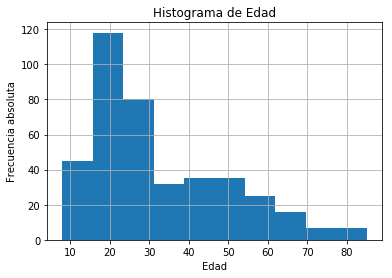

In [11]:
BD.Edad.hist()
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia absoluta')
plt.savefig('./Resultados/fig_histogramaedad.png', dpi= 100)

Text(0.5, 1.0, 'Edad según nivel educacional')

Text(0.5, 0, 'Nivel Educacional')

Text(0, 0.5, 'Edad')

Text(0.5, 0.98, '')

,N,Mean,SD,SE,95% Conf.,Interval
Niv. Educación,,,,,,
Sin estudios,6,53.000000,27.062890,11.048378,29.278331,76.721669
Básica,57,37.263158,21.804756,2.888110,31.552143,42.974173
Media,208,30.538462,16.370070,1.135060,28.308376,32.768547
Técnico,59,36.288136,15.171492,1.975160,32.383591,40.192680
Universitario,70,30.628571,13.706204,1.638205,27.394507,33.862636


F_onewayResult(statistic=5.0147303103239205, pvalue=0.0005946847304504734)

KruskalResult(statistic=15.878419832492373, pvalue=0.003186721265447797)

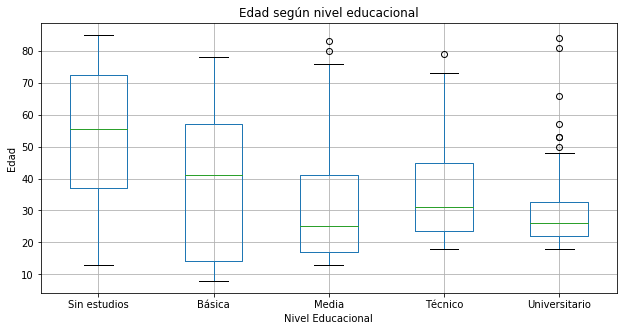

In [83]:
BD.boxplot(column=['Edad'], by = 'Niv. Educación',
           #positions=['Sin Estudios', 'Básica', 'Media', 'Técnico', 'Universitario'],
           figsize=(10,5))
plt.title('Edad según nivel educacional')
plt.xlabel('Nivel Educacional')
plt.ylabel('Edad')
plt.suptitle('')
plt.savefig('./Resultados/fig_edadxeducacion.png', dpi= 100)

rp.summary_cont(BD['Edad'].groupby(BD['Niv. Educación']))

stats.f_oneway(BD['Edad'][BD['Niv. Educación'] == 'Sin estudios'], 
               BD['Edad'][BD['Niv. Educación'] == 'Básica'],
               BD['Edad'][BD['Niv. Educación'] == 'Media'],
               BD['Edad'][BD['Niv. Educación'] == 'Técnico'],
               BD['Edad'][BD['Niv. Educación'] == 'Universitario'])

stats.kruskal(BD['Edad'][BD['Niv. Educación'] == 'Sin estudios'], 
               BD['Edad'][BD['Niv. Educación'] == 'Básica'],
               BD['Edad'][BD['Niv. Educación'] == 'Media'],
               BD['Edad'][BD['Niv. Educación'] == 'Técnico'],
               BD['Edad'][BD['Niv. Educación'] == 'Universitario']
              )

In [72]:
niveles = BD['Niv. Educación']
niveles.unique()
tab_frec(niveles)

[Técnico, Universitario, Media, Básica, Sin estudios]
Categories (5, object): [Sin estudios < Básica < Media < Técnico < Universitario]

,n,%
Niv. Educación,,
Media,208,52.00
Universitario,70,17.50
Técnico,59,14.75
Básica,57,14.25
Sin estudios,6,1.50
Total,400,100.00


In [39]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(2, size= (101, 2)),columns= ['disease', 'treatment'])

rp.summary_cat(df['disease'])
rp.summary_cat(df[['disease', 'treatment']])

,Variable,Outcome,Count,Percent
0,disease,0,53,52.48
1,,1,48,47.52


,Variable,Outcome,Count,Percent
0,disease,0,53,52.48
1,,1,48,47.52
2,treatment,1,52,51.49
3,,0,49,48.51


count    400.000000
mean       2.612500
std        0.642944
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Conocimiento, dtype: float64

Text(0.5, 1.0, 'Conocimiento según nivel educacional')

Text(0.5, 0, 'Nivel Educacional')

Text(0, 0.5, 'Conocimiento')

Text(0.5, 0.98, '')

,N,Mean,SD,SE,95% Conf.,Interval
Niv. Educación,,,,,,
Sin estudios,6,2.000000,1.095445,0.447214,1.039800,2.960200
Básica,57,2.456140,0.708877,0.093893,2.270474,2.641807
Media,208,2.610577,0.664695,0.046088,2.520026,2.701128
Técnico,59,2.694915,0.500146,0.065113,2.566197,2.823633
Universitario,70,2.728571,0.536263,0.064096,2.602037,2.855106


F_onewayResult(statistic=3.0801950127867803, pvalue=0.016178542731393644)

KruskalResult(statistic=9.902968129662696, pvalue=0.04209427834965966)

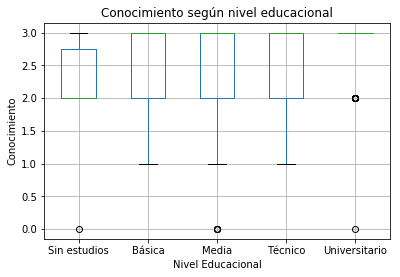

In [84]:
BD.Conocimiento.describe()
BD.boxplot(column=['Conocimiento'], by = 'Niv. Educación')
plt.title('Conocimiento según nivel educacional')
plt.xlabel('Nivel Educacional')
plt.ylabel('Conocimiento')
plt.suptitle('')
plt.savefig('./Resultados/fig_conocimientoxeducacion.png', dpi= 100)

rp.summary_cont(BD['Conocimiento'].groupby(BD['Niv. Educación']))

stats.f_oneway(BD['Conocimiento'][BD['Niv. Educación'] == 'Sin estudios'], 
               BD['Conocimiento'][BD['Niv. Educación'] == 'Básica'],
               BD['Conocimiento'][BD['Niv. Educación'] == 'Media'],
               BD['Conocimiento'][BD['Niv. Educación'] == 'Técnico'],
               BD['Conocimiento'][BD['Niv. Educación'] == 'Universitario'])

stats.kruskal(BD['Conocimiento'][BD['Niv. Educación'] == 'Sin estudios'], 
               BD['Conocimiento'][BD['Niv. Educación'] == 'Básica'],
               BD['Conocimiento'][BD['Niv. Educación'] == 'Media'],
               BD['Conocimiento'][BD['Niv. Educación'] == 'Técnico'],
               BD['Conocimiento'][BD['Niv. Educación'] == 'Universitario']
              )

count    400.000000
mean       6.067500
std        1.370269
min        0.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        7.000000
Name: Pertinencia, dtype: float64

Text(0.5, 1.0, 'Pertinencia según nivel educacional')

Text(0.5, 0, 'Nivel Educacional')

Text(0, 0.5, 'Pertinencia')

Text(0.5, 0.98, '')

KruskalResult(statistic=8.253747192168449, pvalue=0.08271307745933223)

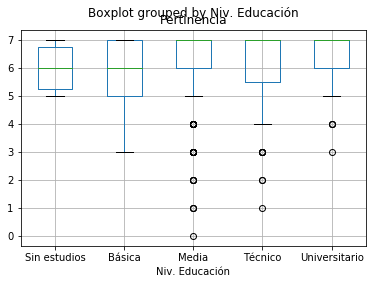

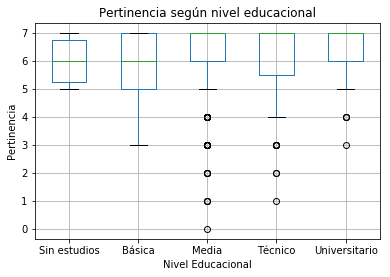

In [81]:
BD.boxplot(column=['Pertinencia'], by = 'Niv. Educación')

BD.Pertinencia.describe()
BD.boxplot(column=['Pertinencia'], by = 'Niv. Educación')
plt.title('Pertinencia según nivel educacional')
plt.xlabel('Nivel Educacional')
plt.ylabel('Pertinencia')
plt.suptitle('')
plt.savefig('./Resultados/fig_cpertinenciaxeducacion.png', dpi= 100)

stats.kruskal(BD['Pertinencia'][BD['Niv. Educación'] == 'Sin estudios'], 
               BD['Pertinencia'][BD['Niv. Educación'] == 'Básica'],
               BD['Pertinencia'][BD['Niv. Educación'] == 'Media'],
               BD['Pertinencia'][BD['Niv. Educación'] == 'Técnico'],
               BD['Pertinencia'][BD['Niv. Educación'] == 'Universitario']
              )

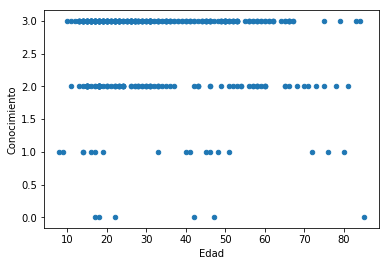

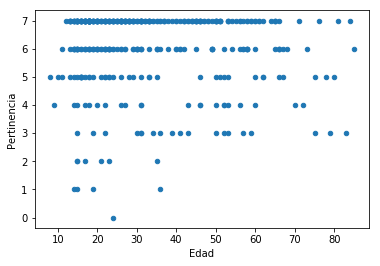

In [14]:
BD.plot(kind='scatter', y='Conocimiento', x='Edad')
BD.plot(kind='scatter', y='Pertinencia', x='Edad')

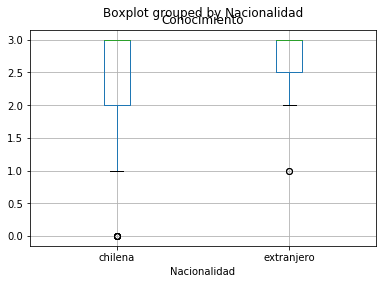

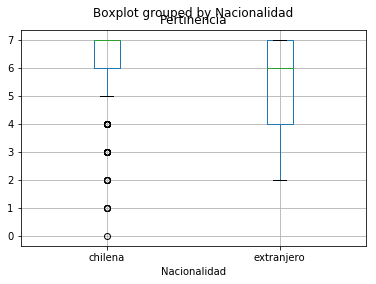

In [15]:
BD.boxplot(column=['Conocimiento'], by = 'Nacionalidad')
BD.boxplot(column=['Pertinencia'], by = 'Nacionalidad')

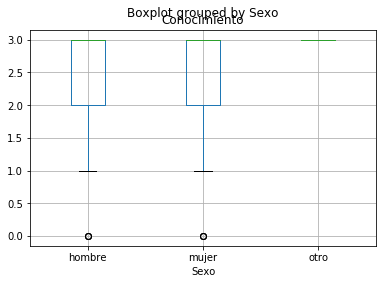

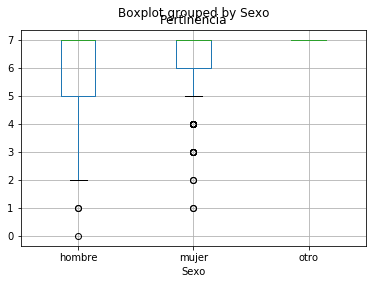

In [16]:
BD.boxplot(column=['Conocimiento'], by = 'Sexo')
BD.boxplot(column=['Pertinencia'], by = 'Sexo')

Text(0.5, 0.98, '')

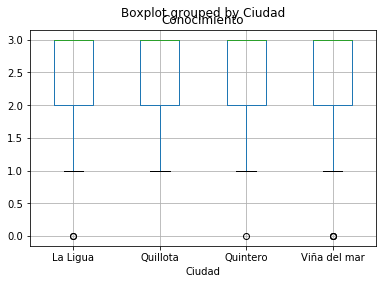

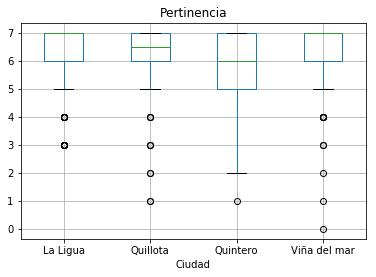

In [17]:
BD.boxplot(column=['Conocimiento'], by = 'Ciudad')
BD.boxplot(column=['Pertinencia'], by = 'Ciudad')
plt.suptitle('')